In [6]:

import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
import numpy as np

df_2 = pd.read_csv("experiment_2/report.csv")
df_3 = pd.read_csv("experiment_3/report.csv")
df = pd.concat([df_3, df_2])
df.head()
plt.style.use("default")

In [7]:
experiment_efficiency = df.groupby(["experiment_name", "experiment_iteration"])[
                            "obj_status"].mean() * 100  #.sum() / 18 * 100
experiment_efficiency_std = experiment_efficiency.groupby("experiment_name").std()

In [8]:

experiment_efficiency = experiment_efficiency.groupby("experiment_name").mean()

In [9]:

experiment_cost = df.groupby(["experiment_name", "experiment_iteration"])["sum_price"].mean()
experiment_cost_std = experiment_cost.groupby("experiment_name").std()
experiment_cost = experiment_cost.groupby("experiment_name").mean()

In [10]:

experiment = pd.merge(experiment_efficiency, experiment_cost, on="experiment_name")
experiment = experiment.sort_values("sum_price")

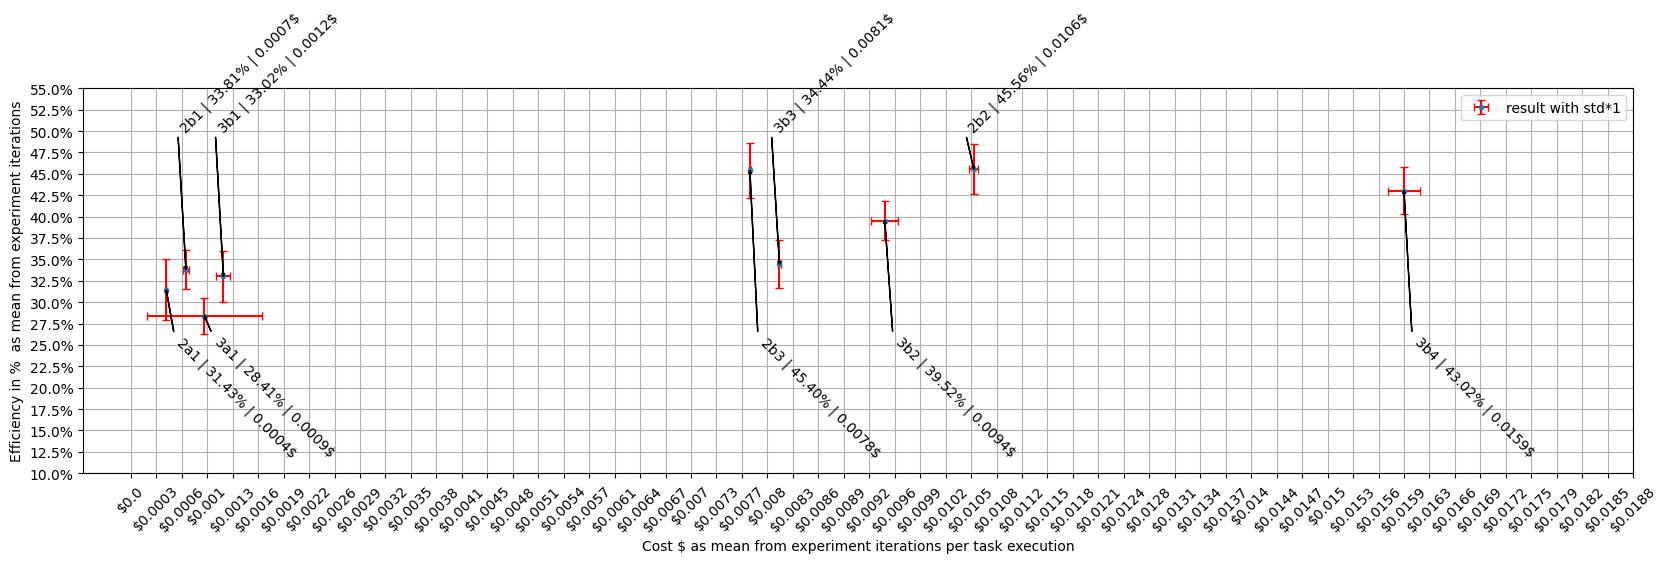

In [11]:
plt.style.use("default")
fig, ax = plt.subplots(figsize=(20, 5))
# ax.scatter(experiment["sum_price"], experiment["obj_status"], marker='x')
ax.set_xlabel("Cost $ as mean from experiment iterations per task execution")
ax.set_ylabel("Efficiency in %  as mean from experiment iterations")
for i, txt in enumerate(experiment.index):
    ax.annotate(f"{txt[-3:]} | {experiment['obj_status'][i]:.2f}% | {experiment['sum_price'][i]:.4f}$",
                (experiment["sum_price"][i], experiment["obj_status"][i]),
                xytext=(experiment["sum_price"][i] + (lambda x: 0.0001 if x % 2 == 0 else -0.0001)(i) ,(lambda x: 12 if x % 2 == 0 else 50)(i)),
                arrowprops=dict(facecolor='black', shrink=1,width=0.005, headwidth=2, headlength=2),
                # fontsize=15,
                rotation=(lambda x: -45 if x % 2 == 0 else 45)(i)
                # xytext=(experiment["sum_price"][i],experiment["obj_status"][i] + 5 * (lambda x: 1 if x % 2 == 0 else -1)(i)),
                )
    # rotate text
# add to x label $ sign to the number
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(round(x, 4))))
# add to y label % sign to the number
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}%".format(round(x, 1))))

ax.errorbar(experiment["sum_price"], experiment["obj_status"], xerr=experiment_cost_std.values,
            yerr=experiment_efficiency_std.values, fmt='.', capsize=3, ecolor='red')
# ax.set_yticks([0, *[round(_,3) for _ in experiment["obj_status"].values], 50])
ax.set_yticks(np.arange(10, 56, 2.5))
# ax.set_xticks( [*np.arange(0,0.0016, 0.0016/6), * np.arange(0, experiment["sum_price"].max()*1.2, experiment["sum_price"].max()/50)])
ax.set_xticks(np.arange(0, experiment["sum_price"].max()*1.2, experiment["sum_price"].max()/50))
plt.xticks(rotation = 45)
plt.legend(["result with std*1"])
plt.grid()
plt.show()

In [12]:
experiment["sum_price"].min()

0.0004439766666666422